<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/main/List1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# # install
!pip install flake8
!pip install pycodestyle pycodestyle_magic


# # load
%load_ext pycodestyle_magic

%pycodestyle_on

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Zadanie 1

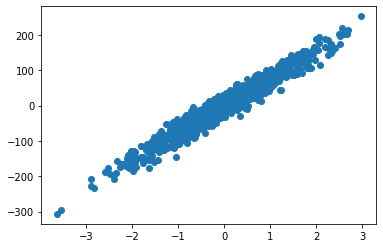

In [100]:
# Data without modification
x_data, y_data = make_regression(n_samples=1000, n_features=1, noise=18)

plt.scatter(x_data, y_data)
plt.show()

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')
# TODO: Change shape of y_* datasets from zero-dimensional to 1-dimensional
# TODO: Add cross validation for another linear models

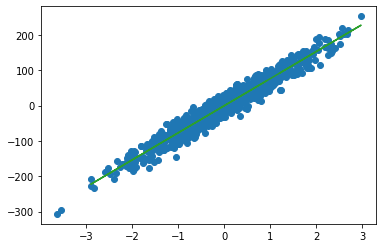

In [102]:
linreg = LinearRegression().fit(x_train,
                                y_train)

y_test_predict = linreg.predict(x_test)
y_train_predict = linreg.predict(x_train).reshape(-1, 1)

plt.scatter(x_data, y_data)
plt.plot(x_train,
         y_train_predict,
         color='tab:green',
         label="Prediction on training dataset")
# plt.plot(x_test, y_test_predict, color='tab:red'
# , label="Prediction on training dataset")

# Zadanie 2

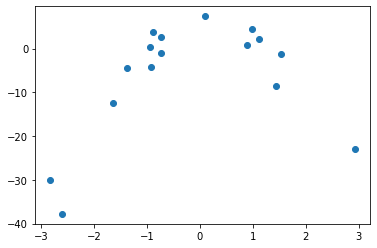

In [103]:
def make_polynomial_regression(n_samples=100.0, noise=0.0):
    X = 2.5*np.random.randn(n_samples, 1)
    y = 4 + 2*X + (-4)*X**2 + noise*np.random.randn(n_samples, 1)
    return X, y


x_data, y_data = make_polynomial_regression(16, 5)
plt.scatter(x_data, y_data)
plt.show()

In [108]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_data_poly = poly_features.fit_transform(x_data)

reg = LinearRegression()
reg.fit(x_data_poly, y_data)

# TODO: split datasets on train and test

LinearRegression()

In [110]:
x_vals = np.linspace(-2, 2, 20).reshape(-1, 1)
x_vals_poly = poly_features.transform(x_vals)

y_vals = reg.predict(x_vals_poly)

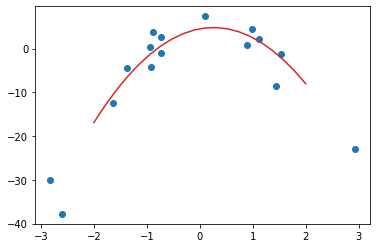

In [111]:
plt.scatter(x_data, y_data)
plt.plot(x_vals, y_vals, color="tab:red")

plt.show()